In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import math
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import pandas as pd
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = train_df.values
test_data = test_df.values

In [5]:
Y = train_data[:,0]
X = train_data[:,1:]

In [6]:
##split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [9]:
# Flatten the training and test images
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

# Convert training and test labels to one hot matrices
Y_train =convert_to_one_hot(y_train, 10)
Y_test = convert_to_one_hot(y_test, 10)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 33600
number of test examples = 8400
X_train shape: (784, 33600)
Y_train shape: (10, 33600)
X_test shape: (784, 8400)
Y_test shape: (10, 8400)


In [10]:
def create_placeholders(n_x, n_y):
   
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    keep_prob=tf.placeholder(tf.float32,name="Dropout")
    
    return X, Y , keep_prob

In [12]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. 
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3, W4, b4
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    
    W1 = tf.get_variable("W1", [10, 784], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [10, 1], initializer = tf.zeros_initializer())
    #W2 = tf.get_variable("W2", [300, 500], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    #b2 = tf.get_variable("b2", [300, 1], initializer = tf.zeros_initializer())
    #W3 = tf.get_variable("W3", [10, 300], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    #b3 = tf.get_variable("b3", [10, 1], initializer = tf.zeros_initializer())
    #W4 = tf.get_variable("W4", [6, 10], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    #b4 = tf.get_variable("b4", [6, 1], initializer = tf.zeros_initializer())
    

    parameters = {"W1": W1,
                  "b1": b1}
                  #"W2": W2,
                  #"b2": b2,
                  #"W3": W3,
                  #"b3": b3}
                  #"W4": W4,
                  #"b4": b4}
    
    return parameters

In [13]:
def forward_propagation(X, parameters,keep_prob):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    #W2 = parameters['W2']
    #b2 = parameters['b2']
    #W3 = parameters['W3']
    #b3 = parameters['b3']
    #W4 = parameters['W4']
    #b4 = parameters['b4']
    
                
    with tf.device("/gpu:0"):
        Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
        #A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
        #drop_out=tf.nn.dropout(A1,keep_prob)
        #Z2 = tf.add(tf.matmul(W2,A1), b2)                     # Z2 = np.dot(W2, a1) + b2
        #A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
        #drop_out=tf.nn.dropout(A2,keep_prob)
        #Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
        #A3 = tf.nn.relu(Z3)
        #drop_out=tf.nn.dropout(A3,keep_prob)
        #Z4 = tf.add(tf.matmul(W4,drop_out),b4)
    
    
    return Z1

In [14]:
def compute_cost(Z1, Y):
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    
    return cost

In [15]:
def random_mini_batches(X, Y, mini_batch_size = 8):
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [16]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 400, minibatch_size = 8, print_cost = True):
  
    
    #Returns:
    #parameters -- parameters learnt by the model. They can then be used to predict.
    
    
    #ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
                                              # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
   
    X, Y, keep_prob = create_placeholders(n_x, n_y)
    

    # Initialize parameters
    
    parameters = initialize_parameters()
    
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    
    with tf.device("/gpu:0"):
        Z1 = forward_propagation(X, parameters,keep_prob)
    
    
    # Cost function: Add cost function to tensorflow graph
    
        cost = compute_cost(Z1, Y)
    
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size,)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z1), tf.argmax(Y))


        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Cost after epoch 0: 0.968960
Cost after epoch 100: 0.217166
Cost after epoch 200: 0.202536
Cost after epoch 300: 0.194511


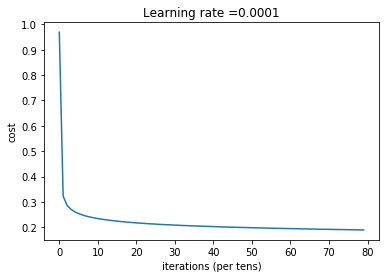

Parameters have been trained!
Train Accuracy: 0.94815475
Test Accuracy: 0.91892856


In [17]:
parameters = model(X_train, Y_train, X_test, Y_test)